In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('predict.csv', index_col=0)
print(f"loaded {len(data)} rows")
data.head()

loaded 8237 rows


,random,semi_random,true
0,0,1,5
1,5,2,2
2,1,4,4
3,3,4,1
4,2,3,3


In [3]:
print(f"all random:      {len(data.loc[data.random==data.true])/len(data)}")
print(f"all semi-random: {len(data.loc[data.semi_random==data.true])/len(data)}")

all random:      0.17166444093723443
all semi-random: 0.27255068592934323


In [4]:
trial = 1000
sample_size = 10

In [5]:
# random sampling
print(f"random sampling trial: {trial}")
print(f"random sampling size : {sample_size}")
print()
randoms = list()
for _ in range(trial):
    sample = data.sample(sample_size)
    randoms.append(len(sample.loc[sample.random==sample.true])/len(sample))
print(f"semi-random sampling minmax-range: {np.min(randoms):.4f} ~ {np.max(randoms):.4f}")
print(f"random sampling mean: {np.mean(randoms):.4f}")
print(f"random sampling std : {np.std(randoms):.4f}")
print(f"semi-random sampling mean+-std: {np.mean(randoms)-np.std(randoms):.4f} ~ {np.mean(randoms)+np.std(randoms):.4f}")

random sampling trial: 1000
random sampling size : 10

semi-random sampling minmax-range: 0.0000 ~ 0.6000
random sampling mean: 0.1784
random sampling std : 0.1182
semi-random sampling mean+-std: 0.0602 ~ 0.2966


Text(0.5, 1.0, 'random sampling')

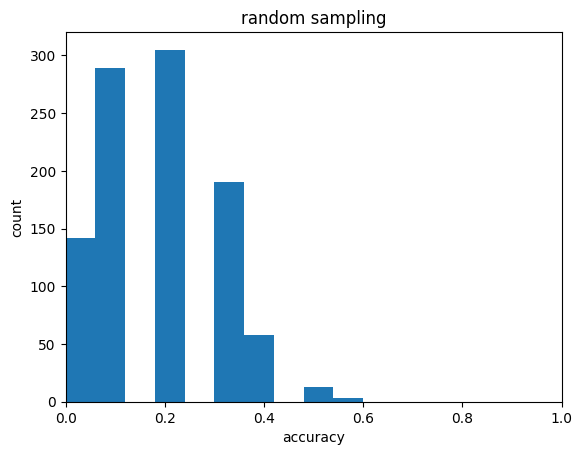

In [6]:
plt.hist(randoms)
plt.xlim(0, 1)
plt.xlabel("accuracy")
plt.ylabel("count")
plt.title(f"random sampling")

In [7]:
# semi-random sampling
print(f"semi-random sampling trial: {trial}")
print(f"semi-random sampling size : {sample_size}")
print()
semi_randoms = list()
for _ in range(trial):
    sample = data.sample(sample_size)
    semi_randoms.append(len(sample.loc[sample.semi_random==sample.true])/len(sample))
print(f"semi-random sampling minmax-range: {np.min(semi_randoms):.4f} ~ {np.max(semi_randoms):.4f}")
print(f"semi-random sampling mean: {np.mean(semi_randoms):.4f}")
print(f"semi-random sampling std : {np.std(semi_randoms):.4f}")
print(f"semi-random sampling mean+-std: {np.mean(semi_randoms)-np.std(semi_randoms):.4f} ~ {np.mean(semi_randoms)+np.std(semi_randoms):.4f}")

semi-random sampling trial: 1000
semi-random sampling size : 10

semi-random sampling minmax-range: 0.0000 ~ 0.7000
semi-random sampling mean: 0.2730
semi-random sampling std : 0.1370
semi-random sampling mean+-std: 0.1360 ~ 0.4100


Text(0.5, 1.0, 'semi-random sampling')

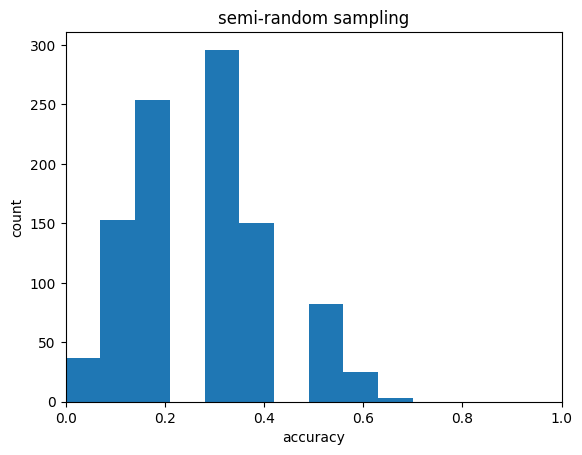

In [8]:
plt.hist(semi_randoms)
plt.xlim(0, 1)
plt.xlabel("accuracy")
plt.ylabel("count")
plt.title("semi-random sampling")